In [35]:
# Author: Kenan BOLAT
# Date: 2024.06.03
# Import necessary libraries
import os.path

import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import xarray as xr
import datetime
import re

In [37]:
process_folder = 'data'
file_name = 'CS_OFFL_SIR_TDP_LI_ANTARC_20200131T233342_20200131T233512_13_00205_B001.nc'

In [38]:

# Read Data Using NETCDF4 Library
file_path = os.path.join(process_folder, file_name)
nc_file = Dataset(file_path, mode='r')
for key  in nc_file.variables.keys():
    print(f"{key}, {nc_file.variables[key].shape}" )

instrument_mode, (1913,)
time, (1913,)
latitude, (1913,)
longitude, (1913,)
elevation, (1913,)
backscatter, (1913,)
surface_type, (1913,)
reference_dem, (1913,)
basin_id, (1913,)
basin_id2, (1913,)
uncertainty, (1913,)


# Q1

In [39]:
pattern = r'_(\d{8}T\d{6})_(\d{8}T\d{6})_'
match = re.search(pattern, file_name)
second_timestamp = match.group(2)
second_month = int(second_timestamp[4:6])
print('Q1 : Second Month:', second_month)

Second Month: 1


# Q2

In [42]:

elevation = nc_file.variables['elevation'][:]
# remove nan values
elevation = np.where(np.isnan(elevation), np.nanmean(elevation), elevation)
# check whether there are still nan values
if np.isnan(elevation).any():
    print('There are still nan values in the elevation array')
else:
    mean_elevation = np.mean(elevation, axis=0)
    # result is 2210.6329341294063
print(f"Q2 : Mean Elevation :  {mean_elevation}")

Mean Elevation :  2210.6329341294063


# Q3 

In [43]:
elevation = nc_file.variables['elevation'][:]
nan_count = np.isnan(elevation).sum()
print(f"Q3 : Nan Count :  {nan_count}")

Nan Count :  62


# Q4 

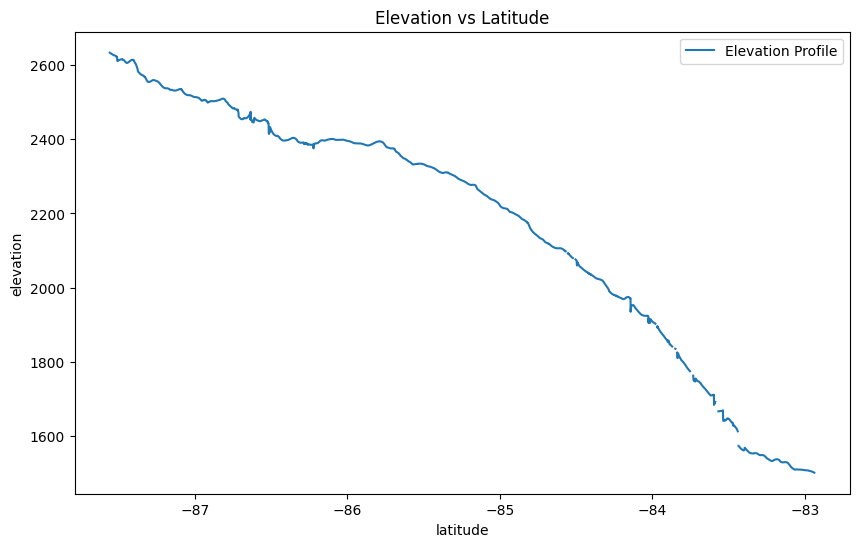

In [44]:

latitude = nc_file.variables['latitude'][:]
longitude = nc_file.variables['longitude'][:]

plt.figure(figsize=(10, 6))
plt.plot(latitude, elevation, label='Elevation Profile')
plt.xlabel('latitude')
plt.ylabel('elevation')
plt.title('Elevation vs Latitude')
plt.legend()
output_path = os.path.join('data', 'elevation_vs_latitude.png')  # Specify the path and filename for the output PNG file
plt.savefig(output_path)
plt.show()




# Q5
## Discussion
### First Part:
Data download can be be autmated by using the requests library to download the data from the server
for this I would create a standalone docker solution whose sole purpos is to check and download the data
from the server using simple flask apis. Downloaded files can be stored in a shared volume or a shared folder
that can be accessed by the main application. By this way downloading and progress of the download can be monitored and managed easily.  
### Second Part:
Using latest available python libraries and microservices tool both the process and the data handling can be scaled up
using the kubernetes and docker capabilities. For the data processing part, we can use the dask
library which is a parallel computing library that integrates well with the xarray library. We can load data in chunks to avoid memory issues using dask easily.
In order to increase the maintainability of the code and the data daily data files can be merged into one file using the xarray library. By using the xarray library we can easily merge the files and perform the necessary operations on the multilayerd 3d dat rather than vector data. In some cases we can even use PostgreSQL and PostGIS database in conjunction with the gdal library to store and process the data as well.
